<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/FYP/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

##Data Preparation

In [2]:
data = pd.read_csv('BridgeData.csv')

In [3]:
data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

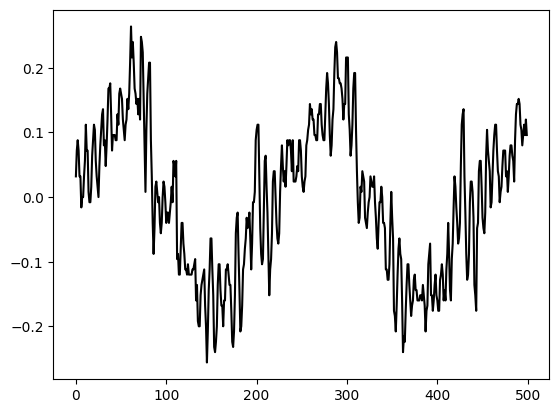

In [4]:
X, y = [], []

clabels = np.array(data['Healthy'])

for i in range(len(sequences)):
  plt.clf()
  plt.plot(sequences[i], color='black')
  name = 'image'+str(clabels[i])+'.png'
  plt.savefig(name)
  image = Image.open(name)
  image = image.resize((128,128))

  X.append(np.array(image))
  y.append(clabels[i])

X, y = np.array(X), np.array(y)

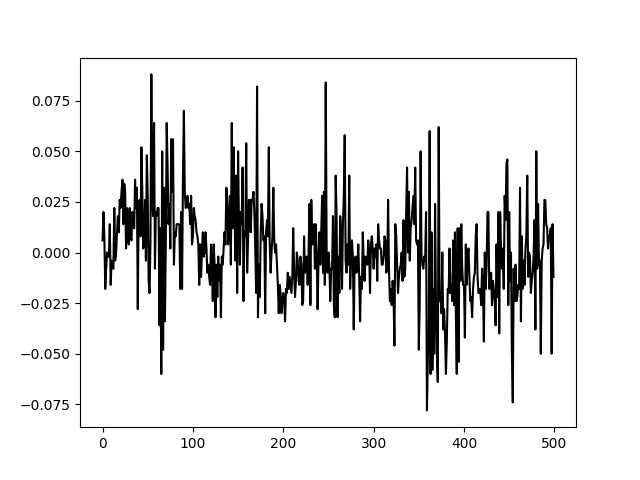

In [16]:
image = Image.open('image0.png')
image

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=int(len(data)*0.3), shuffle=True, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=int(len(X_temp)*0.5), shuffle=True, random_state=42)

In [15]:
len(X_train), len(X_test), len(X_valid)

(949, 203, 203)

In [7]:
X_train[0].shape

(128, 128, 4)

##Model Training and Evaluation

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(128, 128, 4)),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
history = model.fit(
  X_train,
  y_train,
  validation_data=(X_valid, y_valid),
  epochs=5,
  verbose=1,
  batch_size=32
)

Epoch 1/5
30/30 [==============================] - 72s 2s/step - loss: 1.4318 - accuracy: 0.5911 - val_loss: 0.7300 - val_accuracy: 0.9754
Epoch 2/5
30/30 [==============================] - 70s 2s/step - loss: 0.5897 - accuracy: 0.9737 - val_loss: 0.4635 - val_accuracy: 0.9852
Epoch 3/5
30/30 [==============================] - 70s 2s/step - loss: 0.4221 - accuracy: 0.9789 - val_loss: 0.3887 - val_accuracy: 0.9852
Epoch 4/5
30/30 [==============================] - 70s 2s/step - loss: 0.3072 - accuracy: 0.9842 - val_loss: 0.3163 - val_accuracy: 0.9901
Epoch 5/5
30/30 [==============================] - 68s 2s/step - loss: 0.2390 - accuracy: 0.9884 - val_loss: 0.2566 - val_accuracy: 0.9901


In [11]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 4s 530ms/step - loss: 0.2476 - accuracy: 0.9803


[0.2476344108581543, 0.9802955389022827]

###Training Accuracy = 98.84% and Test Accuracy = 98.03%

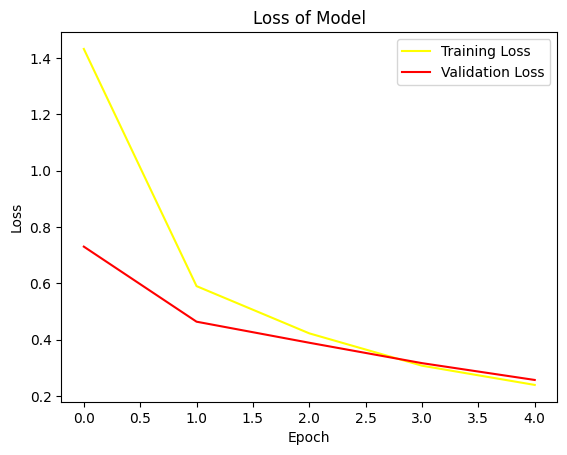

In [12]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Classification Report

In [13]:
y_pred = [0 if num<=0 else 1 for num in model.predict(X_test)]
print(classification_report(y_test, y_pred))

7/7 [==============================] - 4s 530ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.97      0.99      0.98        98

    accuracy                           0.98       203
   macro avg       0.98      0.98      0.98       203
weighted avg       0.98      0.98      0.98       203

